In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('drug.csv',delimiter=',')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
print ('gender',df['Sex'].unique())
print('BP',df['BP'].unique())
print('chorlesterol',df['Cholesterol'].unique())
print('drug',df['Drug'].unique())


gender ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
chorlesterol ['HIGH' 'NORMAL']
drug ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [4]:
gender ={'F' : 1, 'M':0}
BP = {'HIGH':1,'LOW':2, 'NORMAL' : 3}
chorlesterol  ={'HIGH':1 ,'NORMAL':3}
drug ={'drugY':1, 'drugC':2, 'drugX':3, 'drugA':4 ,'drugB':5}

In [5]:
df['Sex'] =df['Sex'].map(gender)
df['BP']=df['BP'].map(BP)
df['Cholesterol']=df['Cholesterol'].map(chorlesterol)
#df['Drug']=df['Drug'].map(drug)

In [6]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,1,1,25.355,drugY
1,47,0,2,1,13.093,drugC
2,47,0,2,1,10.114,drugC
3,28,1,3,1,7.798,drugX
4,61,1,2,1,18.043,drugY
...,...,...,...,...,...,...
195,56,1,2,1,11.567,drugC
196,16,0,2,1,12.006,drugC
197,52,0,3,1,9.894,drugX
198,23,0,3,3,14.020,drugX


In [7]:
data = ['Age'	,'Sex'	,'BP',	'Cholesterol','Na_to_K']
x= df[data]
y = df['Drug']

In [8]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.3 , random_state=3)

In [9]:
dtree = DecisionTreeClassifier()
Dtree = dtree.fit(x_train , y_train)
pred = dtree.predict(x_test)

In [12]:
from sklearn import metrics 
print('accuracy :', metrics.accuracy_score(y_test,pred))

accuracy : 0.9833333333333333


[Text(0.625, 0.9, 'Na_to_K <= 14.615\ngini = 0.676\nsamples = 140\nvalue = [16, 11, 11, 33, 69]'),
 Text(0.5, 0.7, 'BP <= 1.5\ngini = 0.685\nsamples = 71\nvalue = [16, 11, 11, 33, 0]'),
 Text(0.25, 0.5, 'Age <= 50.5\ngini = 0.483\nsamples = 27\nvalue = [16, 11, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]'),
 Text(0.75, 0.5, 'Cholesterol <= 2.0\ngini = 0.375\nsamples = 44\nvalue = [0, 0, 11, 33, 0]'),
 Text(0.625, 0.3, 'BP <= 2.5\ngini = 0.499\nsamples = 21\nvalue = [0, 0, 11, 10, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 0, 23, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 69\nvalue = [0, 0, 0, 0, 69]')]

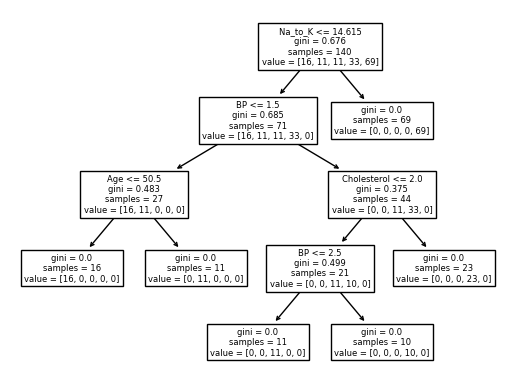

In [40]:
from sklearn import tree
tree.plot_tree(dtree,feature_names=data)
